# Fitting a Nanoparticle Formfactor Model
In the following example, we analyze SAXS diffractorgrams of nanoparticle suspensions in order to determine the size an shape of the particles via a formfactor model.

In [1]:
import sys
sys.path.append('./..') # this is required to recognize the nanoscatterfit package which is located in the parent directory
import numpy as np
# collect suspension files
import glob
files=glob.glob('data\\suspensions\\*chi')
files

['data\\suspensions\\suspension1.chi',
 'data\\suspensions\\suspension2.chi',
 'data\\suspensions\\suspension3.chi',
 'data\\suspensions\\suspension4.chi']

In [2]:
from nanoscatterfit import  import_rawdata
#import the diffractogram into a dataframe either using predefined function or pandas
df=import_rawdata(files[0])
df.head()

,q,I
0,0.012804,432.31934
1,0.038412,445.14215
2,0.064020,447.13855
3,0.089628,457.45987
4,0.115236,490.04810


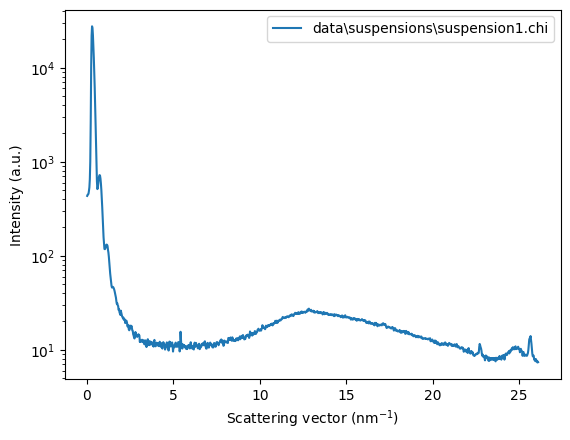

In [3]:
#plot the data
from nanoscatterfit import plot
plot(df, x='q',y='I', label=files[0])


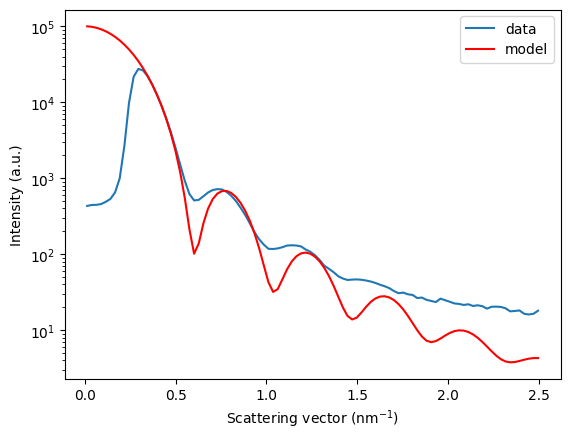

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# cut off irrelevant q values
from nanoscatterfit import cut_diffractogram
df=cut_diffractogram(df, 0,2.5)
plot(df, ax=ax, label='data')

from nanoscatterfit import plot_formmodel
params= [7.5,0.05,5,0]
plot_formmodel(df.q,params, distribution='lognormal', shape='spherical',  ax=ax, label='model')

./..\nanoscatterfit\nanoscatterfit.py:394: RuntimeWarning: invalid value encountered in log
  popt, pcov = curve_fit(lambda q,mu, sigma, C, y0:np.log(model(q,mu, sigma, C, y0)), q_data, np.log(I_data), p0=initial_params)


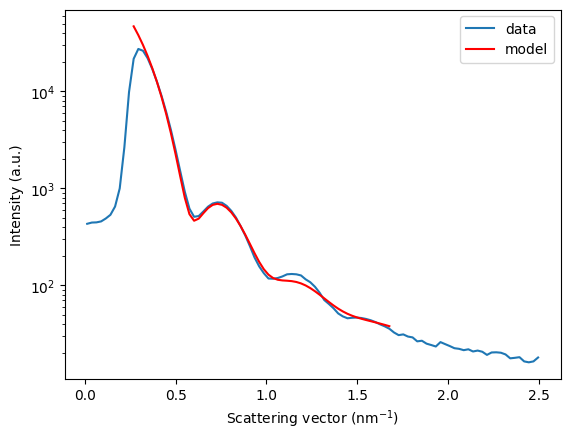

In [5]:
# fit with initialized parameters
from nanoscatterfit import fit_formfactor
params= [7.5,0.05,5,0]
from nanoscatterfit import cut_diffractogram
dff=cut_diffractogram(df, 0.25,1.7)
popt, pcov, fitresult = fit_formfactor(dff.q, dff.I, params, distribution='lognormal', shape='spherical',distribution_type='number')


# plot the fit
fig, ax = plt.subplots()
plot(df, ax=ax, label='data')
plot_formmodel(dff.q,popt, distribution='lognormal', shape='spherical',distribution_type='number',  ax=ax, label='model')

In [6]:
print(fitresult)

mean size: 7.69 nm, mode size: 7.56 nm +/- 10.7 %


./..\nanoscatterfit\nanoscatterfit.py:394: RuntimeWarning: invalid value encountered in log
  popt, pcov = curve_fit(lambda q,mu, sigma, C, y0:np.log(model(q,mu, sigma, C, y0)), q_data, np.log(I_data), p0=initial_params)
./..\nanoscatterfit\nanoscatterfit.py:394: RuntimeWarning: invalid value encountered in log
  popt, pcov = curve_fit(lambda q,mu, sigma, C, y0:np.log(model(q,mu, sigma, C, y0)), q_data, np.log(I_data), p0=initial_params)
./..\nanoscatterfit\nanoscatterfit.py:394: RuntimeWarning: invalid value encountered in log
  popt, pcov = curve_fit(lambda q,mu, sigma, C, y0:np.log(model(q,mu, sigma, C, y0)), q_data, np.log(I_data), p0=initial_params)
./..\nanoscatterfit\nanoscatterfit.py:394: RuntimeWarning: invalid value encountered in log
  popt, pcov = curve_fit(lambda q,mu, sigma, C, y0:np.log(model(q,mu, sigma, C, y0)), q_data, np.log(I_data), p0=initial_params)


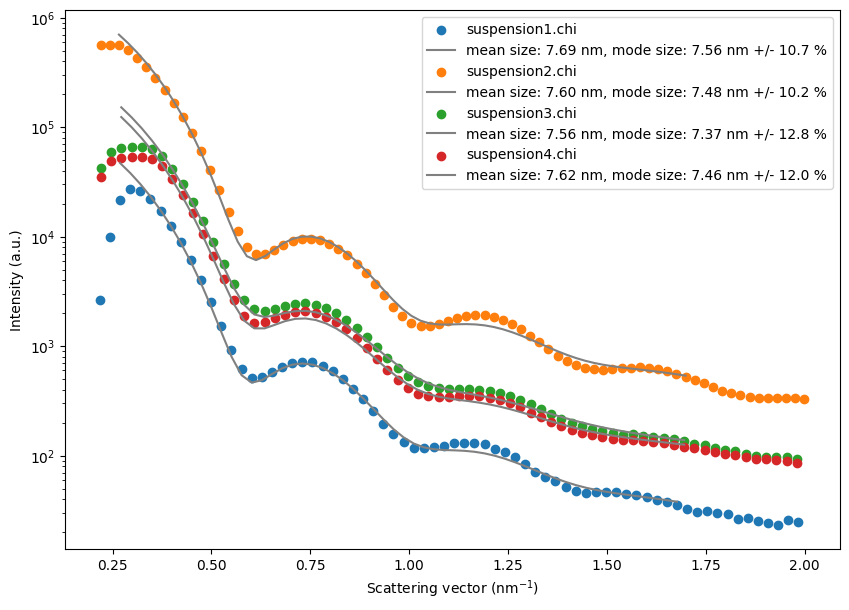

In [7]:
# batch processing for formfactor analysis
fig, ax = plt.subplots(figsize=(10,7))

params= [7.5,0.05,5,0]
for f in files:
    df=cut_diffractogram(import_rawdata(f),0.2,2)
    
    dff=cut_diffractogram(df, 0.25,1.7)
    popt, pcov, fitresult = fit_formfactor(dff.q, dff.I, params, distribution='lognormal', shape='spherical',distribution_type='number')
    
    plot(df, ax=ax, label=f.split('\\')[-1], line=False)
    plot_formmodel(dff.q,popt, distribution='lognormal', shape='spherical',distribution_type='number',  ax=ax, label=fitresult, color='grey')
